In [5]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn import preprocessing
from itertools import islice
import seaborn as sns
from scipy.stats import binom
from scipy.stats import norm
import statsmodels.stats.api as sms

In [16]:
data_frame = pd.read_csv("adsmart.csv")
drop_mask = data_frame.query('yes==0 and no==0')
data_frame=data_frame.drop(drop_mask.index)


In [17]:
exposed_yes = data_frame.query('experiment == "exposed"').yes
exposed_count = len(exposed_yes)
exposed_yes_count = exposed_yes.sum(axis=0)

control_yes = data_frame.query('experiment == "control"').yes
control_count = len(control_yes)
control_yes_count = control_yes.sum(axis=0)

print('Converted Control:',control_yes_count/control_count,'    Total Control:',control_count)
print('Converted Exposed:',exposed_yes_count/exposed_count,'    Total Exposed:',exposed_count)

Converted Control: 0.45051194539249145     Total Control: 586
Converted Exposed: 0.4687975646879756     Total Exposed: 657


In [39]:
# SPRT 
# Binomial Endpoints

import sprt as sprt
import numpy as np

# Null value
h0 = control_yes_count/control_count
# Alternative value
h1 = exposed_yes_count/exposed_count
# Type I error rate = 0.05
alpha = 0.05
# Type II error rate = 0.2
beta = 0.2
# Values
values = np.random.binomial(1, h1, 100)
test = sprt.SPRTBinomial(h0 = h0, h1 = h1, alpha = alpha, beta = beta, values = values)


Decision:	Continue

     values   lower   upper
n                          
91       44  20.666  79.483
92       45  21.126  79.943
93       45  21.585  80.403
94       45  22.045  80.862
95       46  22.505  81.322
96       46  22.964  81.782
97       47  23.424  82.241
98       47  23.884  82.701
99       47  24.343  83.160
100      48  24.803  83.620


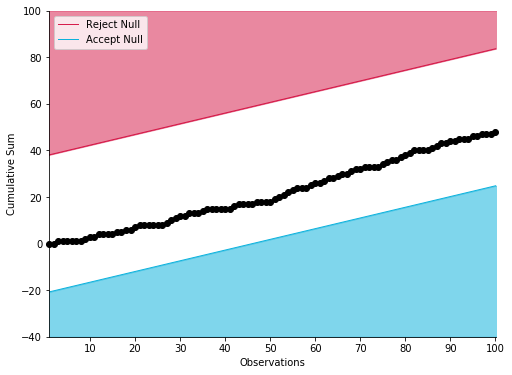

In [40]:
test.plot()

## As shown above we cannot stop the test at this point, we have to proceed